In [1]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

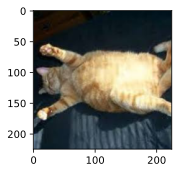

In [2]:
d2l.set_figsize()
img = d2l.Image.open('../img/cat1.jpg')
d2l.plt.imshow(img);

大多数图像增广方法都具有一定的随机性。为了便于观察图像增广的效果，我们下面定义辅助函数apply。 此函数在输入图像img上多次运行图像增广方法aug并显示所有结果。

In [3]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

翻转和裁剪

左右翻转图像：们使用transforms模块来创建RandomFlipLeftRight实例，这样就各有50%的几率使图像向左或向右翻转

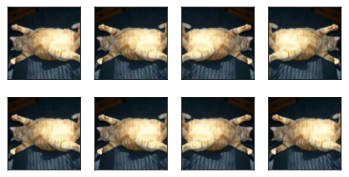

In [4]:
apply(img, torchvision.transforms.RandomHorizontalFlip())

上下翻转:上下翻转图像不如左右图像翻转那样常用。但是，至少对于这个示例图像，上下翻转不会妨碍识别。接下来，我们创建一个RandomFlipTopBottom实例，使图像各有50%的几率向上或向下翻转

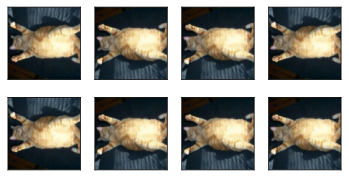

In [5]:
apply(img,torchvision.transforms.RandomVerticalFlip())

随机裁剪

```
随机选位置：在原图中随机选一个位置
随机定大小：面积在原图的10%-100%之间随机选
随机定形状：宽高比在0.5-2之间随机选
裁剪：按照选定的位置、大小、形状裁剪
缩放：把裁剪结果调整成200×200

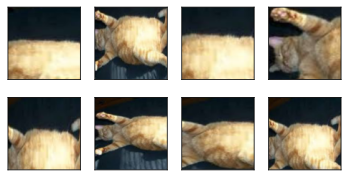

In [10]:
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200,200),scale=(0.1,1),ratio=(0.5,2))
apply(img,shape_aug)

改变颜色

另一种增广方法是改变颜色。 我们可以改变图像颜色的四个方面：亮度、对比度、饱和度和色调。 在下面的示例中，我们随机更改图像的亮度，随机值为原始图像的50%（1-0.5）到150%（1＋0.5）之间

```
brightness=0.5 - 亮度调整
范围：在 [1-0.5, 1+0.5] = [0.5, 1.5] 之间随机选择
contrast=0 - 对比度
saturation=0 - 饱和度
hue=0 - 色调

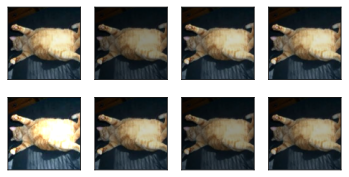

In [13]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0))

同样，我们可以随机更改图像的色调。

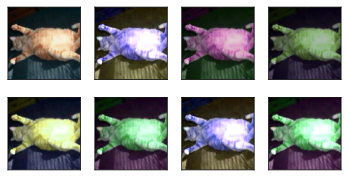

In [16]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0.5))

我们还可以创建一个RandomColorJitter实例，并设置如何同时随机更改图像的亮度（brightness）、对比度（contrast）、饱和度（saturation）和色调（hue）。

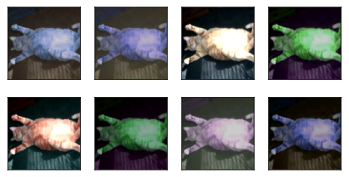

In [17]:
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

结合多种图像增广方法

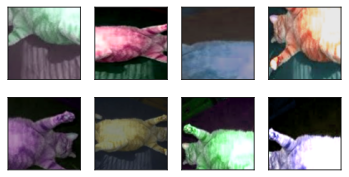

In [19]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)